<a href="https://colab.research.google.com/github/cedricbony/nsiterminale/blob/main/NSI_T04_La_r%C3%A9cursivit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSI#T04 : La récursivité

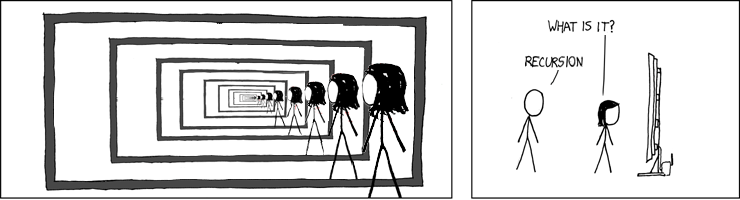

*To understand what recursion is, you must first understand recursion.* *(anonymous quote)*

## Principe général

Une fonction est dite récursive si **elle s'appelle elle-même**.

On distingue la récursivité **terminale** et **non terminale**.

* Une fonction récursive est dite **terminale si et seulement si aucun appel récursif à la fonction en cours de définition n'est situé à l'intérieur d'une expression à évaluer *après* l'évaluation de l'appel récursif.**

* Elle est non terminale dans le cas opposé.

On peut constater le caractère terminal ou non, simplement à la lecture du texte de la fonction.

**Exemples** : La fonction `modulo` ci-dessous est terminale. La fonction `fact`, en revanche, est non-terminale. 

In [ ]:
def modulo(a,b):
    return a if a < b else modulo(a-b, b) # Elle est terminale : on ne fait que réexécuter la fonction modulo()

modulo(200, 60)

20

In [ ]:
def fact(n):
    return 1 if n==0 else n * fact(n-1) # Elle est NON terminale car n est multiplié par fact(n-1), et doit donc être stocké en mémoire.

fact(5)

**Remarque** : Pour observer le caractère terminal ou non d'une fonction récursive, on peut aussi utiliser un instrument adapté, par exemple l'environnement **Thonny** qui permet de visualiser en mode pas à pas, ou [PythonTutor](http://www.pythontutor.com/visualize.html#mode=edit), l'ensemble des appels récursifs par ouverture d'une nouvelle fenêtre à chaque appel d'une fonction.

* *Si le résultat final est calculé dans le dernier appel récursif et transmis en cascade aux appels précédents, la récursivité est terminale.*

* *Si un résultat intermédiaire d'un appel sert d'argument à un calcul ultérieur, la récursivité est non terminale.*

Cette distinction est utile pour évaluer la complexité en mémoire d'une fonction récursive. Dans le cas terminal, les contextes intermédiaires n'ont pas besoin d'être mémorisés. **La récursion terminale peut être traduite par une simple itération.**

Il est possible d'employer la récursivité dans l'étude des formes fractales : le plus célèbre exemple est le **flocon de Koch**, dont vous pouvez expérimenter le code ci-dessous :

In [ ]:
# L'installation de Turtle pour Colaboratory est un prérequis indispensable ici :
!pip install ColabTurtle
from ColabTurtle.Turtle import *

In [ ]:
# Fractale de Koch
def Koch(length, depth):
  if depth == 0:
    forward(length)
  else:
    Koch(length, depth - 1)
    right(60)
    Koch(length, depth - 1)
    left(120)
    Koch(length, depth - 1)
    right(60)
    Koch(length, depth - 1)

# Flocon de Koch
def flocon(l,n):
  for i in range(3):
    Koch(l,n)
    right(-120)

# Paramètres du flocon :
size = 10
step = 2

# Tracé :
initializeTurtle(initial_speed=10)
color('blue')
bgcolor('white')
width(1)
left(90)
penup()
goto(30*step*size,15*step*size)
pendown()
flocon(size,step)

## Les règles de base

Observons la fonction récursive (mal) écrite ci-dessous :

In [ ]:
def decompte(n):
  print(n, end="..")
  decompte(n-1)

decompte(5)

5..4..3..2..1..0..-1..-2..-3..-4..-5..-6..-7..-8..-9..-10..-11..-12..-13..-14..-15..-16..-17..-18..-19..-20..-21..-22..-23..-24..-25..-26..-27..-28..-29..-30..-31..-32..-33..-34..-35..-36..-37..-38..-39..-40..-41..-42..-43..-44..-45..-46..-47..-48..-49..-50..-51..-52..-53..-54..-55..-56..-57..-58..-59..-60..-61..-62..-63..-64..-65..-66..-67..-68..-69..-70..-71..-72..-73..-74..-75..-76..-77..-78..-79..-80..-81..-82..-83..-84..-85..-86..-87..-88..-89..-90..-91..-92..-93..-94..-95..-96..-97..-98..-99..-100..-101..-102..-103..-104..-105..-106..-107..-108..-109..-110..-111..-112..-113..-114..-115..-116..-117..-118..-119..-120..-121..-122..-123..-124..-125..-126..-127..-128..-129..-130..-131..-132..-133..-134..-135..-136..-137..-138..-139..-140..-141..-142..-143..-144..-145..-146..-147..-148..-149..-150..-151..-152..-153..-154..-155..-156..-157..-158..-159..-160..-161..-162..-163..-164..-165..-166..-167..-168..-169..-170..-171..-172..-173..-174..-175..-176..-177..-178..-179..-180..-181..-182

RecursionError: ignored

En l'exécutant, on constate une exception de Python, de type `maximum recursion depth exceeded in comparison` : nous sommes donc en face d'une boucle infinie.

🔸 Proposer un moyen d'éviter cette exception et d'obtenir ce que l'on souhaite :

In [ ]:
def decompte(n):
  print(n, end="..")
  return 0 if n == 1 else decompte(n-1)

decompte(5)

5..4..3..2..1..

0

*L'ajout que vous avez proposé ci-dessus nous amène à une règle primoridale lors de l'écriture de fonctions récursives...*

### Règle n°1 : La condition terminale (critère d'arrêt)

* **Une condition terminale, à l'aide d'une structure de contrôle `if`,doit être placée AVANT tout appel récursif.**
* Cette condition est un **cas particulier** de l'appel de la fonction.
* Dans cette condition, il n'y a pas d'autre appel à la fonction : **la chaîne d'appels doit donc s'arrêter**.

Une solution possible serait donc :




In [ ]:
def decompte(n):
  if n == 0:
    print("Décollage !")
  else:
    print(n, end="..")
    decompte(n-1)

decompte(5)

🔺 **La condition terminale ne sert à rien si elle n'est jamais atteinte !** Par exemple, cette modification serait inutile :

```
def decompte(n):
  if n == 100:
    print("Décollage !")
  else:
    print(n, end="..")
    decompte(n-1)

decompte(5)
```



*Ceci nous amène donc à une deuxième règle essentielle...*

### Règle n° 2 : Terminaison

**La chaîne d'appel récursif DOIT conduire au critère d'arrêt.**
C'est évident *a priori*, mais peut parfois être délicat à déterminer concrètement.

### Règle n° 3 : Théorème de Gödel

**Il n'existe aucun moyen de savoir si un programme se termine ou pas.**
* Il faut donc examiner au cas par cas, et **souvent "à la main"**, comment se dérouleront les appels de fonction.
* Même si aucune méthode n'est générale, **le principe de récurrence** (vu en mathématiques) aide souvent !

Prenons l'exemple d'une suite mathématique définie par récurrence. On aimerait définir une suite par son premier terme $u_0=2$ et la formule de passage d'un terme au suivant : $u_n = 3 \times u_{n-1}$, ou plus généralement $u_n = f(u_{n-1})$ où $f$ est une fonction.

Cette définition amène naturellement la programmation récursive suivante :

In [ ]:
# Définition de la fonction f pour faciliter l'appel récursif
def f(x):
  return 3*x

# Définition de la fonction récursive d'après la forme récurrente de la suite.
def u(n):
  if n == 0:    # Critère d'arrêt (et défintion du terme initial)
    return 2
  else:         # Appel récursif
    return f(u(n-1))

print(u(3))

54


🔸 Appliquer cette méthode au calcul du terme d'une suite $(u_n)$ définie par ses deux premiers termes $u_0 = 5$ et $u_1 = 7$ et la formule de passage au terme suivant : $u_n = 2 \times u_{n-2} + 3 \times u_{n-1}$

In [ ]:
def f(x,y):


31

## De l'itératif au récursif

Vous avez déjà étudié beaucoup de cas où le choix de code itératif (avec boucles `for`ou `while`) convenait parfaitement aux besoins. Voici quelques exemples de codes itératifs très simples.


🔸 Proposez une version récursive de ces programmes écrits en itéartif :

In [ ]:
# Compte à rebours (itératif) de 10 à 0 :
for i in range(10):
  print(10-i, end="..")
print("Décollage !")


10..9..8..7..6..5..4..3..2..1..Décollage !


In [ ]:
# Version récusrive :
def countdown(n):


10..9..8..7..6..5..4..3..2..1..Décollage !


In [ ]:
# Somme des 10 premiers entiers (itératif) :
somme = 0
for i in range(11):
  somme = somme + i
print(somme)

55


In [ ]:
# Version récursive :
def somme(n):


55

🔸 Il est également possible de transformer une fonction récursive en programme itératif. Analysez le code suivant, puis le transformer en itératif :
```
def somme(L):
    if not L:
        return 0
    return L[0]+somme(L[1:])
```



In [ ]:
# Version itérative :
def somme(L):


55

🔺 **Le choix d'une programmation itérative ou récursive dépend du problème posé :** dans certains cas, il sera plus économique (en nombre d'opérations et en temps de calcul) d'appliquer une fonction récursive, alors que dans d'autres cas, une boucle itérative sera préconisée. Nous allons voir cela avec les exemples de la fiche d'entraînement.

D'une manière générale, une écriture récursive permet d'alléger la lecture d'une fonction, mais au détriment d'un temps de calcul un peu plus long.

## L'art récursif

La récursivité se prête particulièrement bien à la visualistaion de structure à répétition de motifs imbriqués, comme dans le cas des **fractales**.

Observez et modifiez le code ci-dessous pour personnaliser votre arbre !

In [ ]:
print("🌳 🌳 🌳 L'arbre fractal ! 🌳 🌳 🌳")

# Création de la fonction récursive de l'arbre
def arbre(height, depth, angle):
  if depth == 0:
    forward(height)
    backward(height)
  else:
    forward(height)
    right(angle)
    arbre(height//2,depth-1,angle+5)
    left(2*angle)
    arbre(height//2,depth-1,angle+5)
    right(angle)
    backward(height)

# Invites utilisateur :
h = int(input("hauteur : "))
d = int(input("profondeur : "))
a = int(input("angle : "))

# Paramètres du tracé
initializeTurtle(initial_speed=10)
color('green')
bgcolor('white')
width(1)

# Tracé de l'arbre
arbre(h,d,a)

🌳 🌳 🌳 L'arbre fractal ! 🌳 🌳 🌳
hauteur : 100
profondeur : 6
angle : 45
